In [104]:
#import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

#load dataset
df= pd.read_csv("listings.csv")

In [105]:
df.head()

,id,listing_url,scrape_id,last_scraped,source,name,description,neighborhood_overview,picture_url,host_id,...,review_scores_communication,review_scores_location,review_scores_value,license,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
0,183319,https://www.airbnb.com/rooms/183319,20220909140055,2022-09-10,previous scrape,Panoramic Ocean View Venice Beach,Craftsmen style penthouse with ocean view from...,About as close to the beach as you can live in...,https://a0.muscache.com/pictures/1170205/e2596...,867995,...,5.00,5.00,5.00,NaN,f,2,2,0,0,0.02
1,51307,https://www.airbnb.com/rooms/51307,20220909140055,2022-09-10,city scrape,Spanish Bungalow Guest House LA CA. 30 plus ni...,PRIVATE GUEST HOUSE<br /><br /><b>The space</b...,"Local LA Community , shops and restaurants in...",https://a0.muscache.com/pictures/294658/ac8d6e...,235568,...,4.85,4.95,4.76,NaN,f,2,2,0,0,0.98
2,184314,https://www.airbnb.com/rooms/184314,20220909140055,2022-09-10,previous scrape,Boho Chic Flat..Steps to Beach!,"Bright, airy, quiet 1 bdr located just steps f...",You are in one of the beach locations in Los A...,https://a0.muscache.com/pictures/0bc2f8b7-9378...,884031,...,4.93,4.89,4.85,NaN,t,1,1,0,0,0.22
3,51498,https://www.airbnb.com/rooms/51498,20220909140055,2022-09-10,city scrape,Guest House With Its Own Entrance/Exit and Hot...,"Fully self-contained, separate structure, with...",We are close to Venice without the hassle of n...,https://a0.muscache.com/pictures/83426633/c9e3...,236758,...,4.90,4.83,4.74,HSR19-001336,f,1,1,0,0,2.60
4,109,https://www.airbnb.com/rooms/109,20220909140055,2022-09-10,city scrape,Amazing bright elegant condo park front *UPGRA...,"*** Unit upgraded with new bamboo flooring, br...",NaN,https://a0.muscache.com/pictures/4321499/1da98...,521,...,4.00,5.00,4.00,NaN,f,1,1,0,0,0.01


In [106]:
#features in the original dataset
for col in df.columns:
    print(col)

id
listing_url
scrape_id
last_scraped
source
name
description
neighborhood_overview
picture_url
host_id
host_url
host_name
host_since
host_location
host_about
host_response_time
host_response_rate
host_acceptance_rate
host_is_superhost
host_thumbnail_url
host_picture_url
host_neighbourhood
host_listings_count
host_total_listings_count
host_verifications
host_has_profile_pic
host_identity_verified
neighbourhood
neighbourhood_cleansed
neighbourhood_group_cleansed
latitude
longitude
property_type
room_type
accommodates
bathrooms
bathrooms_text
bedrooms
beds
amenities
price
minimum_nights
maximum_nights
minimum_minimum_nights
maximum_minimum_nights
minimum_maximum_nights
maximum_maximum_nights
minimum_nights_avg_ntm
maximum_nights_avg_ntm
calendar_updated
has_availability
availability_30
availability_60
availability_90
availability_365
calendar_last_scraped
number_of_reviews
number_of_reviews_ltm
number_of_reviews_l30d
first_review
last_review
review_scores_rating
review_scores_accuracy
re

In [107]:
#selecting meaningful features to predictt price
df1=df[['name', 'neighborhood_overview', 'neighbourhood', 'latitude', 'longitude', 'property_type', 'room_type', 'bedrooms', 'bathrooms', 'amenities', 'has_availability',  'review_scores_value', 'reviews_per_month', 'price' ]]
df1.head()

,name,neighborhood_overview,neighbourhood,latitude,longitude,property_type,room_type,bedrooms,bathrooms,amenities,has_availability,review_scores_value,reviews_per_month,price
0,Panoramic Ocean View Venice Beach,About as close to the beach as you can live in...,"Los Angeles, California, United States",33.99211,-118.47600,Entire rental unit,Entire home/apt,2.0,NaN,"[""Bed linens"", ""Heating"", ""Dishes and silverwa...",t,5.00,0.02,$152.00
1,Spanish Bungalow Guest House LA CA. 30 plus ni...,"Local LA Community , shops and restaurants in...","Los Angeles, California, United States",34.12206,-118.26783,Entire bungalow,Entire home/apt,1.0,NaN,"[""Air conditioning"", ""Bed linens"", ""Carbon mon...",t,4.76,0.98,$75.00
2,Boho Chic Flat..Steps to Beach!,You are in one of the beach locations in Los A...,"Marina del Rey, California, United States",33.97487,-118.46312,Entire rental unit,Entire home/apt,1.0,NaN,"[""Hangers"", ""Dryer"", ""Smoke alarm"", ""Kitchen"",...",t,4.85,0.22,$125.00
3,Guest House With Its Own Entrance/Exit and Hot...,We are close to Venice without the hassle of n...,"Los Angeles, California, United States",34.00389,-118.44126,Entire guesthouse,Entire home/apt,NaN,NaN,"[""Toaster"", ""Cable TV"", ""Air conditioning"", ""B...",t,4.74,2.60,$189.00
4,Amazing bright elegant condo park front *UPGRA...,NaN,NaN,33.98301,-118.38607,Entire condo,Entire home/apt,2.0,NaN,"[""Cable TV"", ""Air conditioning"", ""Carbon monox...",t,4.00,0.01,$115.00


In [108]:
#drop NA values for some of the numerical data columns
df2=df1.dropna(subset=['review_scores_value', 'reviews_per_month', 'latitude', 'longitude', 'price'])

#convert price from string to int
df2.loc[:,"price"] = df2.loc[:,"price"].str.replace('[\$\,]', '').astype(float)
df2.head()

/var/folders/6w/1czj28vj3_q0hl9l50q3p0m80000gn/T/ipykernel_22035/3292758257.py:5: FutureWarning: The default value of regex will change from True to False in a future version.
  df2.loc[:,"price"] = df2.loc[:,"price"].str.replace('[\$\,]', '').astype(float)
/var/folders/6w/1czj28vj3_q0hl9l50q3p0m80000gn/T/ipykernel_22035/3292758257.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2.loc[:,"price"] = df2.loc[:,"price"].str.replace('[\$\,]', '').astype(float)
/var/folders/6w/1czj28vj3_q0hl9l50q3p0m80000gn/T/ipykernel_22035/3292758257.py:5: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals`

,name,neighborhood_overview,neighbourhood,latitude,longitude,property_type,room_type,bedrooms,bathrooms,amenities,has_availability,review_scores_value,reviews_per_month,price
0,Panoramic Ocean View Venice Beach,About as close to the beach as you can live in...,"Los Angeles, California, United States",33.99211,-118.47600,Entire rental unit,Entire home/apt,2.0,NaN,"[""Bed linens"", ""Heating"", ""Dishes and silverwa...",t,5.00,0.02,152.0
1,Spanish Bungalow Guest House LA CA. 30 plus ni...,"Local LA Community , shops and restaurants in...","Los Angeles, California, United States",34.12206,-118.26783,Entire bungalow,Entire home/apt,1.0,NaN,"[""Air conditioning"", ""Bed linens"", ""Carbon mon...",t,4.76,0.98,75.0
2,Boho Chic Flat..Steps to Beach!,You are in one of the beach locations in Los A...,"Marina del Rey, California, United States",33.97487,-118.46312,Entire rental unit,Entire home/apt,1.0,NaN,"[""Hangers"", ""Dryer"", ""Smoke alarm"", ""Kitchen"",...",t,4.85,0.22,125.0
3,Guest House With Its Own Entrance/Exit and Hot...,We are close to Venice without the hassle of n...,"Los Angeles, California, United States",34.00389,-118.44126,Entire guesthouse,Entire home/apt,NaN,NaN,"[""Toaster"", ""Cable TV"", ""Air conditioning"", ""B...",t,4.74,2.60,189.0
4,Amazing bright elegant condo park front *UPGRA...,NaN,NaN,33.98301,-118.38607,Entire condo,Entire home/apt,2.0,NaN,"[""Cable TV"", ""Air conditioning"", ""Carbon monox...",t,4.00,0.01,115.0


In [109]:
#z_scores = stats.zscore(df2)
#abs_z_scores = np.abs(z_scores)
#filtered_entries = (abs_z_scores < 3).all(axis=1)
#df3 = df2[filtered_entries]

coefficient of determination: 7.860434058204468e-06
intercept: 255.56166651024478
slope: [-2.43789474]


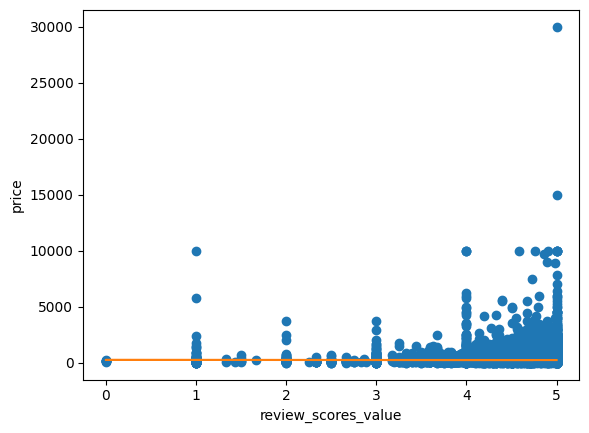

In [111]:
#scatter plots and regression line:

#review_scores_value vs price
x1 = np.array(df2['review_scores_value']).reshape((-1, 1))
y = np.array(df2['price'])
model = LinearRegression()
model.fit(x1, y)
model = LinearRegression().fit(x1, y)
r_sq = model.score(x1, y)
print(f"coefficient of determination: {r_sq}")
print(f"intercept: {model.intercept_}")
print(f"slope: {model.coef_}")
#create basic scatterplot
plt.plot(x1, y, 'o')
plt.xlabel('review_scores_value')
plt.ylabel('price')
#add linear regression line to scatterplot 
plt.plot(x1, model.coef_*x1+model.intercept_)

coefficient of determination: 0.0015879307441114543
intercept: 258.5076742486956
slope: [-9.02193213]


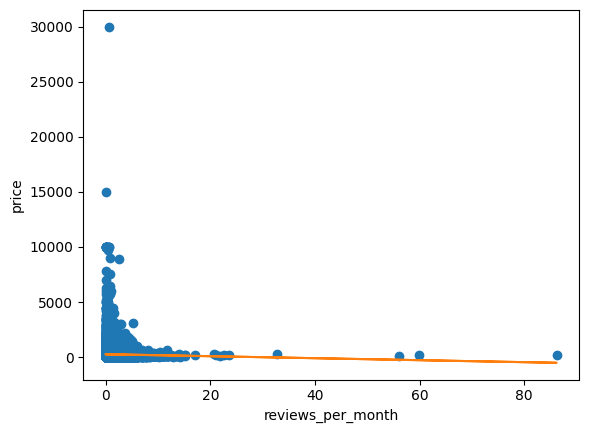

In [112]:
#reviews_per_month vs price
x2 = np.array(df2['reviews_per_month']).reshape((-1, 1))
y = np.array(df2['price'])
model = LinearRegression()
model.fit(x2, y)
model = LinearRegression().fit(x2, y)
r_sq = model.score(x2, y)
print(f"coefficient of determination: {r_sq}")
print(f"intercept: {model.intercept_}")
print(f"slope: {model.coef_}")
#create basic scatterplot
plt.plot(x2, y, 'o')
plt.xlabel('reviews_per_month')
plt.ylabel('price')
#add linear regression line to scatterplot 
plt.plot(x2, model.coef_*x2+model.intercept_)

coefficient of determination: 0.003487043824047964
intercept: 4694.379106817082
slope: [-130.94155564]


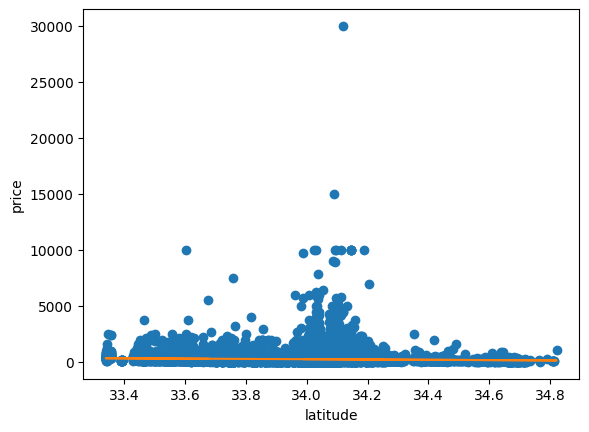

In [113]:
#latitude vs price
x3 = np.array(df2['latitude']).reshape((-1, 1))
y = np.array(df2['price'])
model = LinearRegression()
model.fit(x3, y)
model = LinearRegression().fit(x3, y)
r_sq = model.score(x3, y)
print(f"coefficient of determination: {r_sq}")
print(f"intercept: {model.intercept_}")
print(f"slope: {model.coef_}")
#create basic scatterplot
plt.plot(x3, y, 'o')
plt.xlabel('latitude')
plt.ylabel('price')
#add linear regression line to scatterplot 
plt.plot(x3, model.coef_*x3+model.intercept_)

coefficient of determination: 0.006694010857198784
intercept: -17340.95190133869
slope: [-148.73346445]


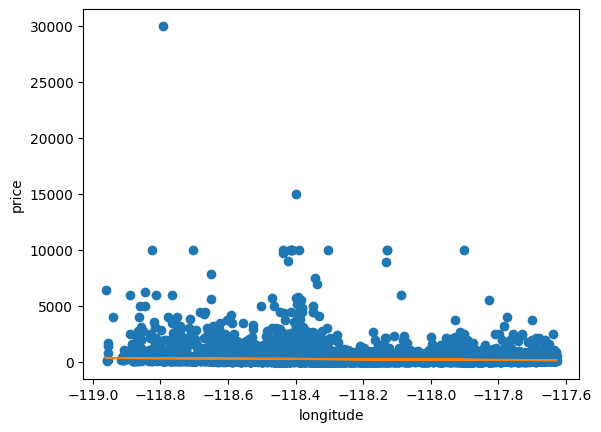

In [114]:
#longitude vs price
x4 = np.array(df2['longitude']).reshape((-1, 1))
y = np.array(df2['price'])
model = LinearRegression()
model.fit(x4, y)
model = LinearRegression().fit(x4, y)
r_sq = model.score(x4, y)
print(f"coefficient of determination: {r_sq}")
print(f"intercept: {model.intercept_}")
print(f"slope: {model.coef_}")
#create basic scatterplot
plt.plot(x4, y, 'o')
plt.xlabel('longitude')
plt.ylabel('price')
#add linear regression line to scatterplot 
plt.plot(x4, model.coef_*x4+model.intercept_)

In [115]:
#trying to filter outlier for review_scores_value vs price
df_filtered = df2[df2["price"] <= 7000]
df_fil1=df_filtered[df_filtered["review_scores_value"]>=1]

coefficient of determination: 2.5389989442015093e-06
intercept: 243.4151798825556
slope: [-1.0813219]


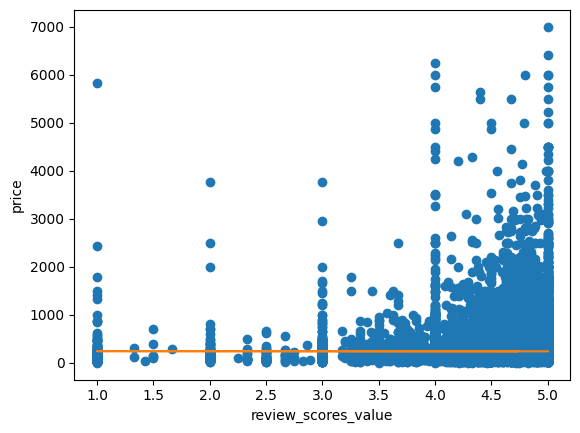

In [116]:
#after filtering outliers, review_scores_value vs price
x11 = np.array(df_fil1['review_scores_value']).reshape((-1, 1))
y = np.array(df_fil1['price'])
model = LinearRegression()
model.fit(x11, y)
model = LinearRegression().fit(x11, y)
r_sq = model.score(x11, y)
print(f"coefficient of determination: {r_sq}")
print(f"intercept: {model.intercept_}")
print(f"slope: {model.coef_}")
#create basic scatterplot
plt.plot(x11, y, 'o')
plt.xlabel('review_scores_value')
plt.ylabel('price')
#add linear regression line to scatterplot 
plt.plot(x11, model.coef_*x11+model.intercept_)

In [117]:
#similarly, should try to remove outliers and check for price vs other features